# Expression Plots

Gene expression plots at single-cell level. Inputs:

1. Seurat object

In [1]:
library(Seurat)
library(ggplot2)
library(scattermore)
library(scales)

### Seurat Object

In [2]:
rna = readRDS("../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/seurat.rds")

## Plotting

### Fig 1 Aesthetics

In [83]:
GENE = "FN1"

In [84]:
cur_gene = as.vector(rna[['RNA']][GENE])

df = data.frame(umap1=data.frame(Embeddings(rna, reduction='umap'))$UMAP_1, 
                umap2=data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
                expr=cur_gene)
# shuffle so days don't overlap
df = df[sample(dim(df)[1], 25000), ]


expr_plot <- ggplot(df) +
# ggplot(df[df$x.sp.sample %in% c("D14"), ]) +
 
# ggtitle(sub("-2[0-9]+", "",GENE)) + 
scale_color_viridis_c(option = "C", name="Log2\nExpr", 
                     limits=c(0,quantile(cur_gene, 0.98)), oob=squish) +
theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    coord_fixed()

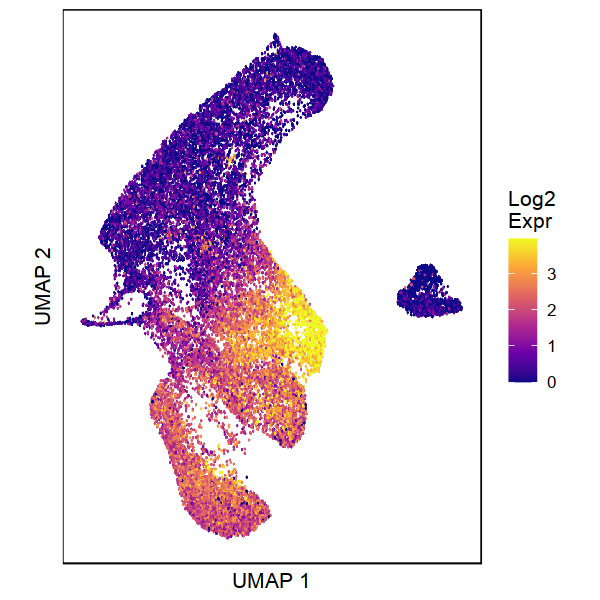

In [85]:
options(repr.plot.width = 5, repr.plot.height = 5)

expr_plot

In [86]:
saveRDS(expr_plot, file=sprintf("./Fig1/subfigs/%s_%s_expr_sc.rds",
                                   format(Sys.Date(), "%Y%m%d"), GENE))

### Fig 2 Aesthetics

In [47]:
GENE = "POU5F1"

In [48]:
cur_gene = as.vector(rna[['RNA']][GENE])

df = data.frame(umap1=data.frame(Embeddings(rna, reduction='umap'))$UMAP_1, 
                umap2=data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
                expr=as.vector(rna[['RNA']][GENE]))
# shuffle so days don't overlap
df = df[sample(dim(df)[1], 25000), ]


expr_plot <- ggplot(df) +
# ggplot(df[df$x.sp.sample %in% c("D14"), ]) +
geom_scattermore(pointsize=10, aes(x=umap1 , y=umap2, col=expr), pixels=c(3000,3000)) +
# ggtitle(sub("-2[0-9]+", "",GENE)) + 
scale_color_viridis_c(option = "C", name="Log \nExpression ",                      
                      limits=c(0,quantile(cur_gene, .995)), oob=squish) +
ggtitle(GENE) + 
theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5, size=16),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          legend.position="bottom",
          legend.justification="right",
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    coord_fixed()

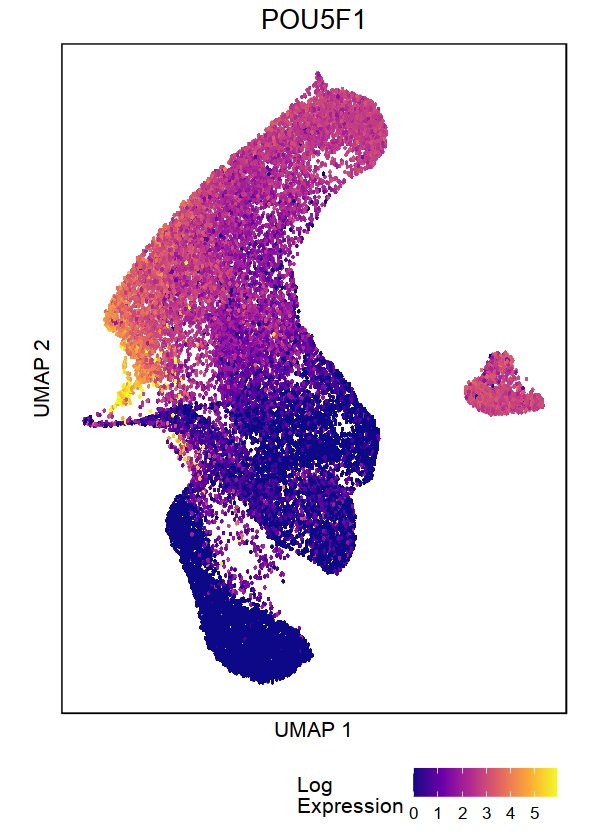

In [49]:
options(repr.plot.width = 5, repr.plot.height = 7)

expr_plot

In [18]:
saveRDS(expr_plot, file=sprintf("./Fig2/subfigs/%s_%s_expr_sc.rds",
                                   format(Sys.Date(), "%Y%m%d"), GENE))